# Univariate and Multivariate Discriminants

Part 1: Gaussian discriminant class (univariate)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from discriminants import GaussianDiscriminant

# Create two numpy arrays: resting and stressed
resting_mean, resting_std = 60, 5
stressed_mean, stressed_std = 100, 5
num_samples = 100
resting = np.random.normal(resting_mean, resting_std, num_samples)
stressed = np.random.normal(stressed_mean, stressed_std, num_samples)

# Create instances of GaussianDiscriminant for resting and stressed datasets
resting_discriminant = GaussianDiscriminant(resting, name='Resting')
stressed_discriminant = GaussianDiscriminant(stressed, name='Stressed')


In [2]:
# Calculate discriminant values for inputs ranging from 40 to 120
x_values = np.linspace(40, 120, 1000)
resting_decision_boundary = np.zeros_like(x_values)
stressed_decision_boundary = np.zeros_like(x_values)

for i, x in enumerate(x_values):
    resting_decision_boundary[i] = resting_discriminant.calc_discriminant(x)
    stressed_decision_boundary[i] = stressed_discriminant.calc_discriminant(x)

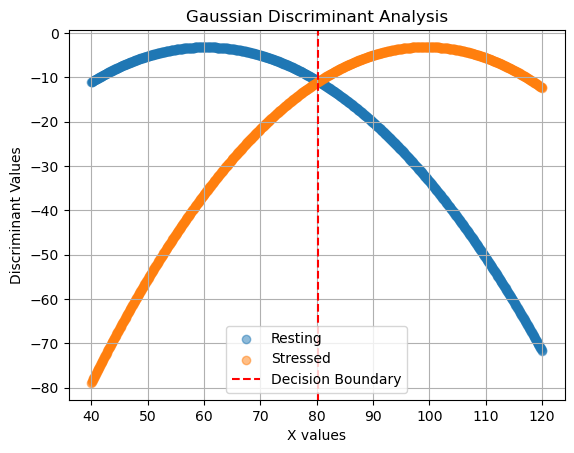

In [3]:
# Plot scatter plot of discriminant values
plt.scatter(x_values, resting_decision_boundary, label='Resting', alpha=0.5)
plt.scatter(x_values, stressed_decision_boundary, label='Stressed', alpha=0.5)

# Show decision boundary
decision_boundary_x = x_values[np.argmin(np.abs(resting_decision_boundary - stressed_decision_boundary))]
decision_boundary_y = (resting_decision_boundary[np.argmin(np.abs(resting_decision_boundary - stressed_decision_boundary))] + 
                      stressed_decision_boundary[np.argmin(np.abs(resting_decision_boundary - stressed_decision_boundary))]) / 2
plt.axvline(x=decision_boundary_x, color='red', linestyle='--', label='Decision Boundary')

# Set labels and legend
plt.xlabel('X values')
plt.ylabel('Discriminant Values')
plt.title('Gaussian Discriminant Analysis')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Part 2: Gaussian discriminant class (Multivariate)

In [4]:
from discriminants import MultivariateGaussian

# Create arrays for resting and stressed
mu_rest = np.array([60, 10])
sigma_rest = np.array([[20, 100], [100, 20]])

mu_stress = np.array([100, 80])
sigma_stress = np.array([[50, 20], [20, 50]])

resting = np.random.multivariate_normal(mu_rest, sigma_rest, 100)
stressed = np.random.multivariate_normal(mu_stress, sigma_stress, 100)



/var/folders/j1/2d31w8mj36dcmbgr8l2lptp40000gn/T/ipykernel_6010/601341364.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting = np.random.multivariate_normal(mu_rest, sigma_rest, 100)


In [5]:
# Fit multivariate gaussian discriminant to each array
resting_gaussian = MultivariateGaussian(prior = 0.5, name='Resting')
resting_gaussian.fit(resting)

stressed_gaussian = MultivariateGaussian(prior = 0.5, name='Stressed')
stressed_gaussian.fit(stressed)


In [6]:
# Create grid for plotting
x_values = np.linspace(20, 120, 100)
y_values = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x_values, y_values)

# Calculate discriminant values for each point in the grid
discriminant_values_resting = np.zeros_like(X)
discriminant_values_stressed = np.zeros_like(X)

for i in range(len(x_values)):
    for j in range(len(y_values)):
        x = np.array([X[i, j], Y[i, j]])
        discriminant_values_resting[i, j] = resting_gaussian.calc_discriminant(x)
        discriminant_values_stressed[i, j] = stressed_gaussian.calc_discriminant(x)


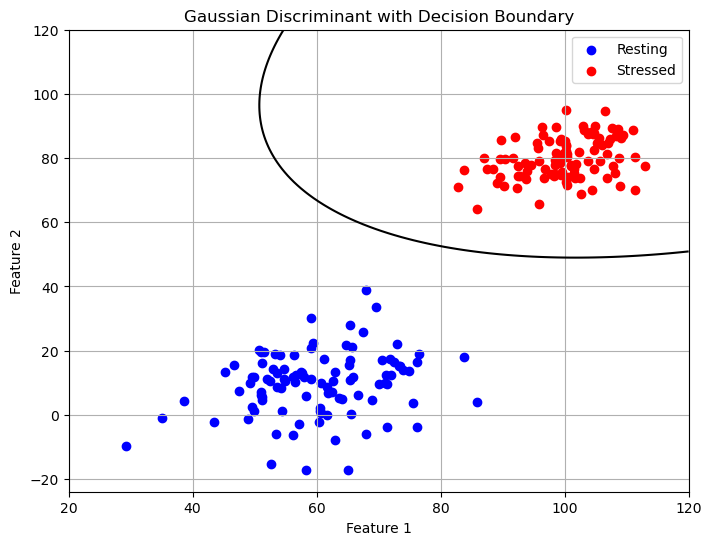

In [7]:
# Plotting
plt.figure(figsize=(8, 6))

# Plot resting data
plt.scatter(resting[:, 0], resting[:, 1], label='Resting', color='blue')

# Plot stressed data
plt.scatter(stressed[:, 0], stressed[:, 1], label='Stressed', color='red')

# Plot decision boundary
plt.contour(X, Y, discriminant_values_resting - discriminant_values_stressed, levels=[0], colors='black')

plt.title('Gaussian Discriminant with Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Part 3: Pooled and Unpooled

In [8]:
from classifiers import DiscriminantClassifier

classifier = DiscriminantClassifier()

classifier.set_classes(resting_gaussian, stressed_gaussian)

x_values = np.linspace(20, 120, 200)
y_values = np.linspace(20, 120, 200)
X, Y = np.meshgrid(x_values, y_values)

Z = np.empty(X.shape, dtype=float)

class_mapping = {'Resting': 0, 'Stressed': 1} 

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = X[i, j]
        y = Y[i, j]
        prediction = classifier.predict(np.array([x, y]))
        Z[i, j] = class_mapping[prediction]



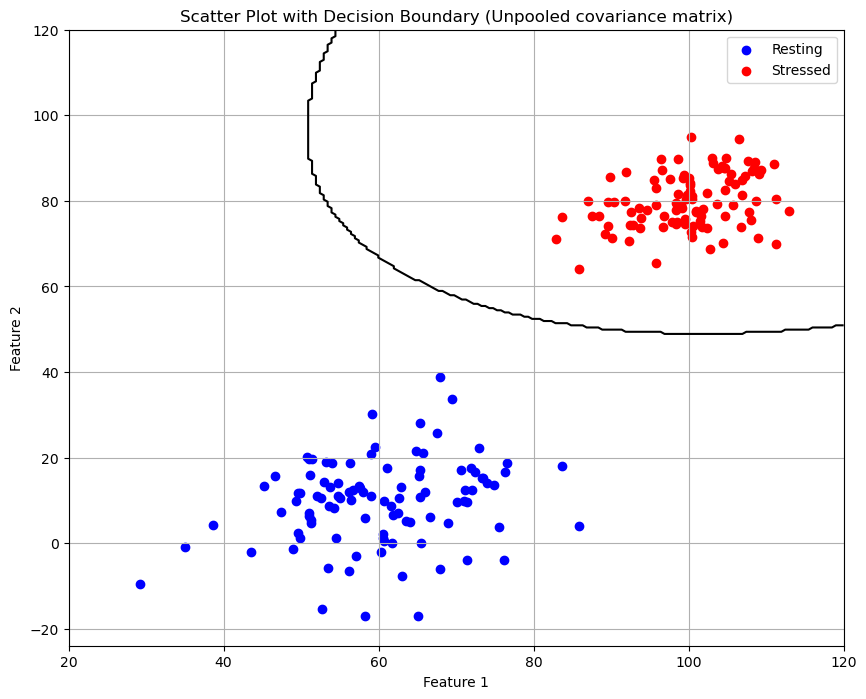

In [9]:
# Scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(resting[:, 0], resting[:, 1], label='Resting', color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label='Stressed', color='red')
plt.contour(X, Y,Z, levels=[0.5], colors='black')  # Decision boundary
plt.title('Scatter Plot with Decision Boundary (Unpooled covariance matrix)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


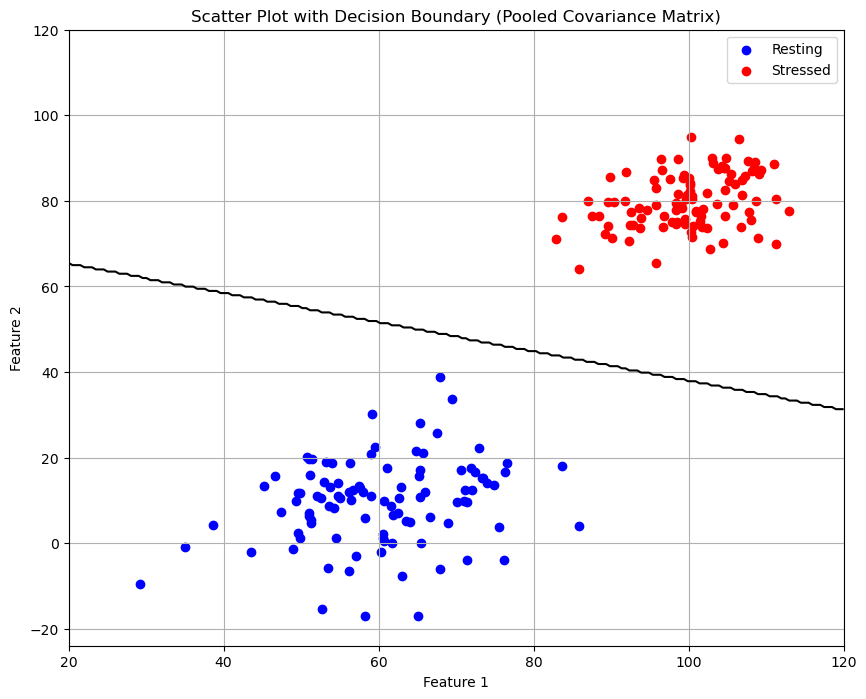

In [10]:
# Scatter plot with decision boundary using pooled covariance matrix
classifier.pool_variances()

# Recalculating the discriminant values with the pooled covariance matrix
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = class_mapping[classifier.predict(x_point)]
plt.figure(figsize=(10, 8))
plt.scatter(resting[:, 0], resting[:, 1], label='Resting', color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label='Stressed', color='red')
plt.contour(X, Y, Z, levels=[0.5], colors='black')  # Decision boundary
plt.title('Scatter Plot with Decision Boundary (Pooled Covariance Matrix)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
resting_gaussian.params['prior'] = 0.4 
stressed_gaussian.params['prior'] = 0.8  

for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x_point = np.array([X[i, j], Y[i, j]])
        Z[i, j] = class_mapping[classifier.predict(x_point)]



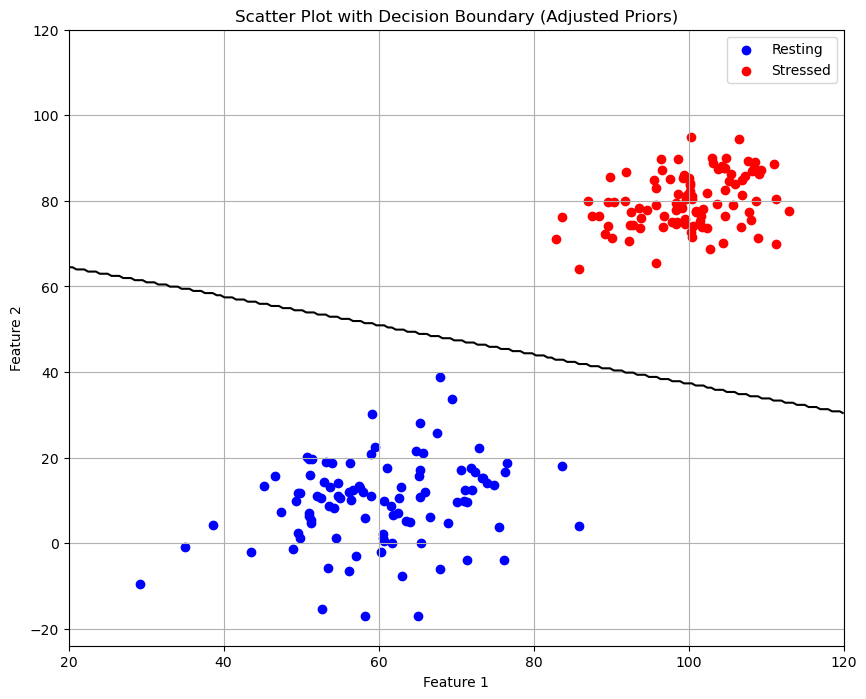

In [15]:
# Scatter plot with decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(resting[:, 0], resting[:, 1], label='Resting', color='blue')
plt.scatter(stressed[:, 0], stressed[:, 1], label='Stressed', color='red')

# Plot decision boundary
plt.contour(X, Y, Z, levels=[0.5], colors='black')

plt.title('Scatter Plot with Decision Boundary (Adjusted Priors)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
